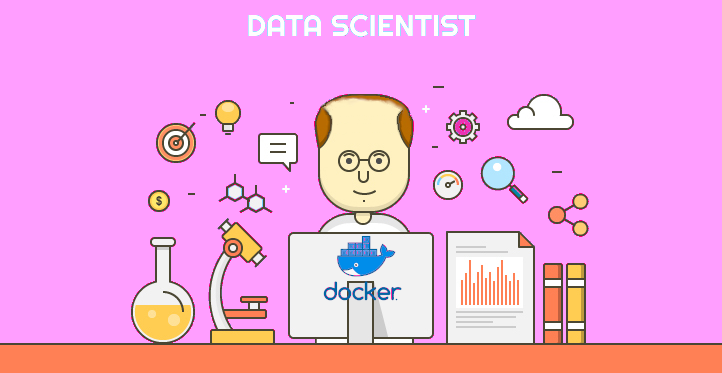

# Matriz de Confusão

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from numpy.random import randint
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

%matplotlib inline

# Análise de Modelo

Foi realizado um teste com base em características de pacientes, existe uma possibilidade de desenvolver (D) ou não (S) determinada doença: 

In [3]:
y_true = pd.Series(['D','D','D','D','D','D','S','S','S','S','S','S','S'])
y_pred = pd.Series(['D','D','S','D','D','D','D','S','D','S','S','D','S'])

Como saber que se o modelo de predição se comportou bem?

## Matrizes de Confusão

É uma tabela que mostra as frequencias de classificação para cada classe do modelo. Considerar as seguintes frequencias:

1. Verdadeiro Positivo (TP - true positive): no conjunto da classe real, o resultado foi correto. Por exemplo o paciente desenvolveu a doença e o modelo previu que iria desenvolver. (T & T)
2. Falso Positivo (FP - false positive): no conjunto da classe real, o resultado foi incorreto. Por exemplo o paciente desenvolveu a doença e o modelo previu que não iria desenvolver. (T & F - Erro tipo 2)
3. Falso Negativo (FN - false negative): no conjunto da classe real, o resultado foi incorreto. Por exemplo o paciente não desenvolveu a doença e o modelo previu que iria desenvolver. (F & T - Erro tipo 1)
4. Verdadeiro Negativo (TN - true negative): no conjunto da classe real, o resultado foi correto. Por exemplo o paciente não desenvolveu a doença e o modelo previu que não iria desenvolver. (F & F)

In [4]:
conf = confusion_matrix(y_true, y_pred)
print(conf)

[[5 1]
 [3 4]]


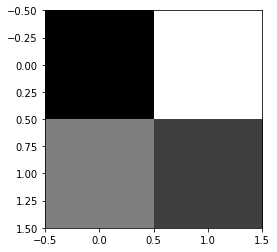

In [5]:
plt.imshow(conf, cmap='binary', interpolation='None')
plt.show()

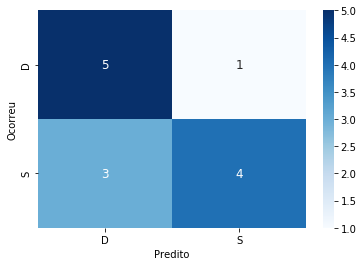

In [6]:
data = {
    'Ocorreu': ['D','D','D','D','D','D','S','S','S','S','S','S','S'],
    'Predito': ['D','D','S','D','D','D','D','S','D','S','S','D','S']
}
df = pd.DataFrame(data, columns=['Ocorreu','Predito'])
conf = pd.crosstab(df['Ocorreu'], df['Predito'], rownames=['Ocorreu'], colnames=['Predito'])
res = sn.heatmap(conf, annot=True, fmt='.0f', annot_kws={"size":12}, cmap=plt.cm.Blues)
plt.show()

## Em valor ou percentual?

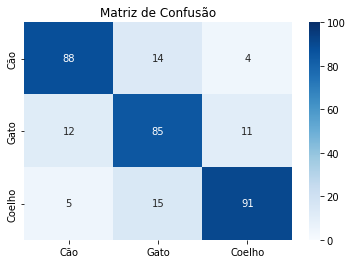

In [7]:
conf_arr = np.array([[88,14,4],[12,85,11],[5,15,91]])

sum = conf_arr.sum()
df_cm = pd.DataFrame(conf_arr,
  index = [ 'Cão', 'Gato', 'Coelho'],
  columns = ['Cão', 'Gato', 'Coelho'])

res = sn.heatmap(df_cm, annot=True, vmin=0.0, vmax=100.0, cmap=plt.cm.Blues)
plt.yticks([0.5,1.5,2.5], ['Cão', 'Gato', 'Coelho'],va='center')
plt.title('Matriz de Confusão')
plt.show()

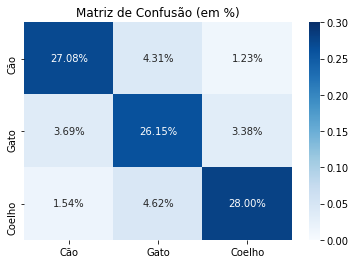

In [8]:
conf_arr = conf_arr * 100.0 / ( 1.0 * sum )
conf_arr /= 100
df_cm = pd.DataFrame(conf_arr,
  index = [ 'Cão', 'Gato', 'Coelho'],
  columns = ['Cão', 'Gato', 'Coelho'])
res = sn.heatmap(df_cm, annot=True, vmin=0.0, vmax=0.3, fmt='.2%', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão (em %)')
plt.show()

## Com o uso de dados aleatórios

In [9]:
lookup = {0: 'Chocolate', 1:'Sorvete'}
y_true = pd.Series([lookup[_] for _ in randint(0, 2, size=100)])
y_pred = pd.Series([lookup[_] for _ in randint(0, 2, size=100)])

pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted']).apply(lambda r: 100.0 * r/r.sum())

Predicted,Chocolate,Sorvete
True,,
Chocolate,51.851852,52.173913
Sorvete,48.148148,47.826087


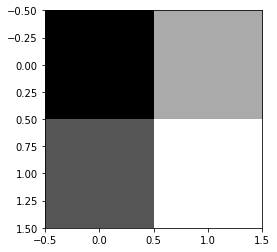

In [10]:
conf = confusion_matrix(y_true, y_pred)
plt.imshow(conf, cmap='binary', interpolation='None')
plt.show()

## Modelo KNN sobre a Íris

In [21]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.9466666666666667


[[19  0  0]
 [ 0 23  4]
 [ 0  0 29]]


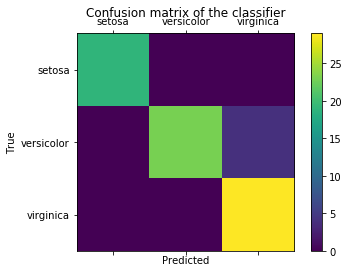

In [22]:
np.set_printoptions(precision=2)
labels = ['setosa', 'versicolor', 'virginica']
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + class_names.tolist())
ax.set_yticklabels([''] + class_names.tolist())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()